# 1. 导入库并且加载数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#读取数据集
test_data=pd.read_csv("../data/test_format1.csv")
train_data=pd.read_csv("../data/train_format1.csv")
user_info=pd.read_csv("../data/user_info_format1.csv")
user_log=pd.read_csv("../data/user_log_format1.csv")


# 2. 探索数据

In [3]:
train_data.head(3)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1


In [4]:
test_data.head(3)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN


In [5]:
user_info.head(5)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [6]:
user_log.head(5)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [7]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [8]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      261477 non-null  int64  
 1   merchant_id  261477 non-null  int64  
 2   prob         0 non-null       float64
dtypes: float64(1), int64(2)
memory usage: 6.0 MB


In [21]:
# 查看缺失值用户年龄
print((user_info.shape[0] - user_info['age_range'].count())/user_info.shape[0] )
print(user_info[user_info['age_range'].isna()|(user_info['age_range']==0)].count())
print(user_info.groupby(['age_range'])['user_id'].count())

0.005226677982884221
user_id      95131
age_range    92914
gender       90664
dtype: int64
age_range
0.0     92914
1.0        24
2.0     52871
3.0    111654
4.0     79991
5.0     40777
6.0     35464
7.0      6992
8.0      1266
Name: user_id, dtype: int64


In [23]:
# 查看缺失值用户性别
print((user_info.shape[0] - user_info['gender'].count())/user_info.shape[0] )
print(user_info[user_info['gender'].isna()|(user_info['gender']==0)].count())
print(user_info.groupby(['gender'])['user_id'].count())

0.01517316170403376
user_id      292074
age_range    289879
gender       285638
dtype: int64
gender
0.0    285638
1.0    121670
2.0     10426
Name: user_id, dtype: int64


In [25]:
# 行为日志缺失数据
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [26]:
user_info.describe()

,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476178,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


label
0    244912
1     15952
Name: user_id, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

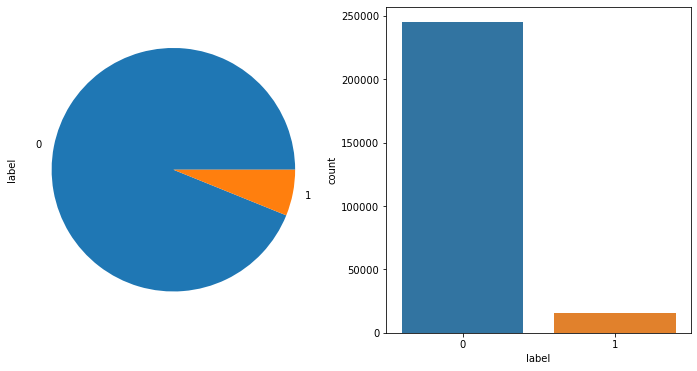

In [33]:
label_gp=train_data.groupby('label')['user_id'].count()
print(label_gp)
_,axe=plt.subplots(1,2,figsize=(12,6))
train_data.label.value_counts().plot(kind='pie',ax=axe[0])
sns.countplot('label',data=train_data,ax=axe[1])

选取top5店铺
店铺	 购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


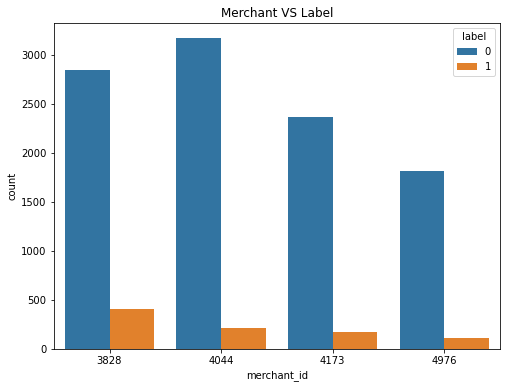

In [39]:
# 探索影响复购的各种因素
print("选取top5店铺\n店铺\t 购买次数")
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant=train_data.copy()
train_data_merchant['TOP5']=train_data_merchant['merchant_id'].map(lambda x:1 if x in [4044,3828,4173,4976] else 0)
train_data_merchant=train_data_merchant[train_data_merchant['TOP5']==1]
plt.figure(figsize=(8,6))
plt.title("Merchant VS Label")
sax=sns.countplot('merchant_id',hue='label',data=train_data_merchant)

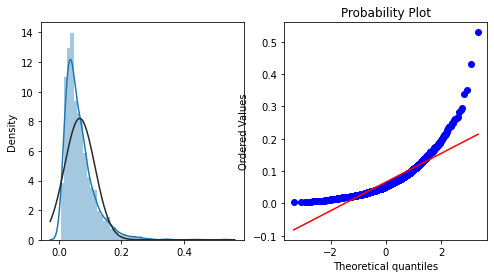

In [74]:
# 查看店铺的复购分布
merchant_repeat_buy=[rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <=1 and rate >0]
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy,fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(merchant_repeat_buy,plot=plt)

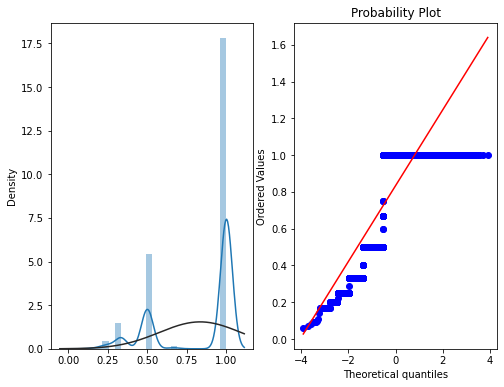

In [75]:
user_repeat_buy=[rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <=1 and rate >0]
plt.figure(figsize=(8,6))
ax=plt.subplot(1,2,1)
sns.distplot(user_repeat_buy,fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(user_repeat_buy,plot=plt)

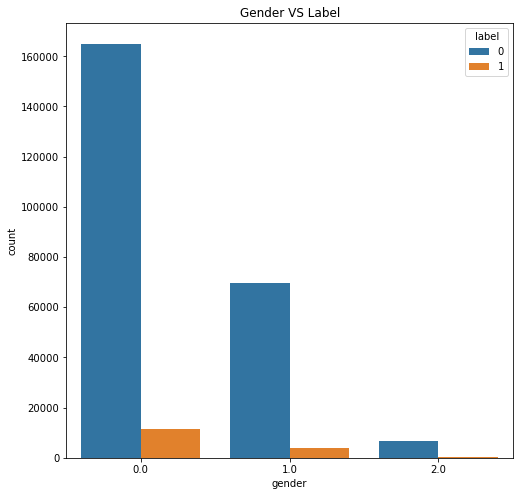

In [77]:
# 用户性别和复购率的关系
train_data_user_info=train_data.merge(user_info,on=['user_id'],how='left')
plt.figure(figsize=(8,8))
plt.title("Gender VS Label")
ax=sns.countplot('gender',hue='label',data=train_data_user_info)
for p in ax.patches:
    height=p.get_height()
    